In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers as tf_layers

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

import time
from PIL import Image

# Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Supposed to be commented out; uncomment only for testing
# train_size = 1000
# test_size = 100
# train_images, train_labels = train_images[:train_size], train_labels[:train_size]
# test_images, test_labels = test_images[:test_size], test_labels[:test_size]

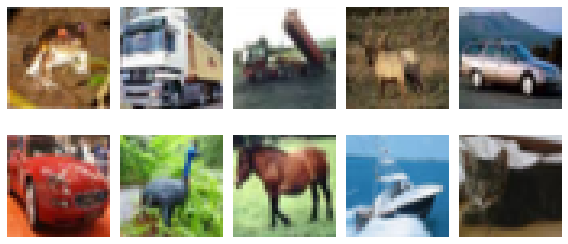

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('./plots/sample_images.jpg')
plt.show()

In [4]:
train_labels_one_hot = tf.one_hot(train_labels[:, 0], 10)
test_labels_one_hot = tf.one_hot(test_labels[:, 0], 10)

train_labels_one_hot[10].numpy()

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Architecture

## Model 1

In [5]:
model_1 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    tf_layers.Conv2D(5, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.Conv2D(5, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.MaxPooling2D(pool_size=(8, 8)),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_1')

## Raw predictions

In [6]:
model_1.predict(train_images[:4])

array([[0.09436174, 0.10264593, 0.05717483, 0.13339648, 0.13856816,
        0.03440982, 0.02540009, 0.09718689, 0.2514515 , 0.06540455],
       [0.09395231, 0.10144049, 0.05639394, 0.13267042, 0.14197138,
        0.03308889, 0.0254953 , 0.09155711, 0.25998032, 0.06344978],
       [0.0912946 , 0.10163171, 0.05553104, 0.13115683, 0.13959159,
        0.03308539, 0.02597955, 0.09382458, 0.2630049 , 0.06489982],
       [0.09392949, 0.10316391, 0.0566088 , 0.13095826, 0.1402831 ,
        0.03489113, 0.02565722, 0.09640413, 0.25267747, 0.06542657]],
      dtype=float32)

## Weights count

In [7]:
model_1.build((1, 32, 32, 3))
model_1.count_params()

1180

## Optimization

In [8]:
BATCH_SIZE = 64
EPOCHS = 150

def compile_and_fit(model, epochs=None):
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    if epochs is None:
        epochs = EPOCHS
    start = time.time()
    model_history = model.fit(train_images, 
                              train_labels_one_hot, 
                              batch_size=BATCH_SIZE, 
                              epochs=epochs, 
                              validation_data=(test_images, test_labels_one_hot))
    end = time.time()
    return model_history, end - start

In [9]:
model_1_history, model_1_elapsed_time = compile_and_fit(model_1)

Epoch 1/150
782/782 [==============================] - 3s 4ms/step - loss: 2.3114 - categorical_accuracy: 0.0982 - val_loss: 2.3037 - val_categorical_accuracy: 0.0826
Epoch 2/150
782/782 [==============================] - 3s 4ms/step - loss: 2.3031 - categorical_accuracy: 0.0964 - val_loss: 2.3023 - val_categorical_accuracy: 0.1052
Epoch 3/150
782/782 [==============================] - 3s 4ms/step - loss: 2.3019 - categorical_accuracy: 0.1061 - val_loss: 2.3013 - val_categorical_accuracy: 0.0990
Epoch 4/150
782/782 [==============================] - 3s 4ms/step - loss: 2.3006 - categorical_accuracy: 0.1116 - val_loss: 2.3000 - val_categorical_accuracy: 0.1035
Epoch 5/150
782/782 [==============================] - 3s 4ms/step - loss: 2.2994 - categorical_accuracy: 0.1131 - val_loss: 2.2981 - val_categorical_accuracy: 0.1115
Epoch 6/150
782/782 [==============================] - 3s 4ms/step - loss: 2.2976 - categorical_accuracy: 0.1217 - val_loss: 2.2980 - val_categorical_accuracy: 0.113

Epoch 50/150
782/782 [==============================] - 3s 4ms/step - loss: 1.7532 - categorical_accuracy: 0.3888 - val_loss: 1.7366 - val_categorical_accuracy: 0.3982
Epoch 51/150
782/782 [==============================] - 3s 4ms/step - loss: 1.7430 - categorical_accuracy: 0.3907 - val_loss: 1.7284 - val_categorical_accuracy: 0.3999
Epoch 52/150
782/782 [==============================] - 3s 4ms/step - loss: 1.7335 - categorical_accuracy: 0.3934 - val_loss: 1.7197 - val_categorical_accuracy: 0.3983
Epoch 53/150
782/782 [==============================] - 3s 4ms/step - loss: 1.7245 - categorical_accuracy: 0.3958 - val_loss: 1.7113 - val_categorical_accuracy: 0.4018
Epoch 54/150
782/782 [==============================] - 3s 4ms/step - loss: 1.7157 - categorical_accuracy: 0.3980 - val_loss: 1.7033 - val_categorical_accuracy: 0.4069
Epoch 55/150
782/782 [==============================] - 3s 4ms/step - loss: 1.7074 - categorical_accuracy: 0.4007 - val_loss: 1.6945 - val_categorical_accuracy:

Epoch 99/150
782/782 [==============================] - 3s 4ms/step - loss: 1.5238 - categorical_accuracy: 0.4600 - val_loss: 1.5170 - val_categorical_accuracy: 0.4656
Epoch 100/150
782/782 [==============================] - 3s 4ms/step - loss: 1.5213 - categorical_accuracy: 0.4611 - val_loss: 1.5142 - val_categorical_accuracy: 0.4673
Epoch 101/150
782/782 [==============================] - 3s 4ms/step - loss: 1.5193 - categorical_accuracy: 0.4624 - val_loss: 1.5116 - val_categorical_accuracy: 0.4685
Epoch 102/150
782/782 [==============================] - 3s 4ms/step - loss: 1.5171 - categorical_accuracy: 0.4632 - val_loss: 1.5115 - val_categorical_accuracy: 0.4695
Epoch 103/150
782/782 [==============================] - 3s 4ms/step - loss: 1.5148 - categorical_accuracy: 0.4650 - val_loss: 1.5074 - val_categorical_accuracy: 0.4697
Epoch 104/150
782/782 [==============================] - 3s 4ms/step - loss: 1.5127 - categorical_accuracy: 0.4651 - val_loss: 1.5061 - val_categorical_accu

In [10]:
print(f'Elapsed time: {model_1_elapsed_time:.2f} s')
model_1_history.history.keys()

Elapsed time: 435.33 s


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

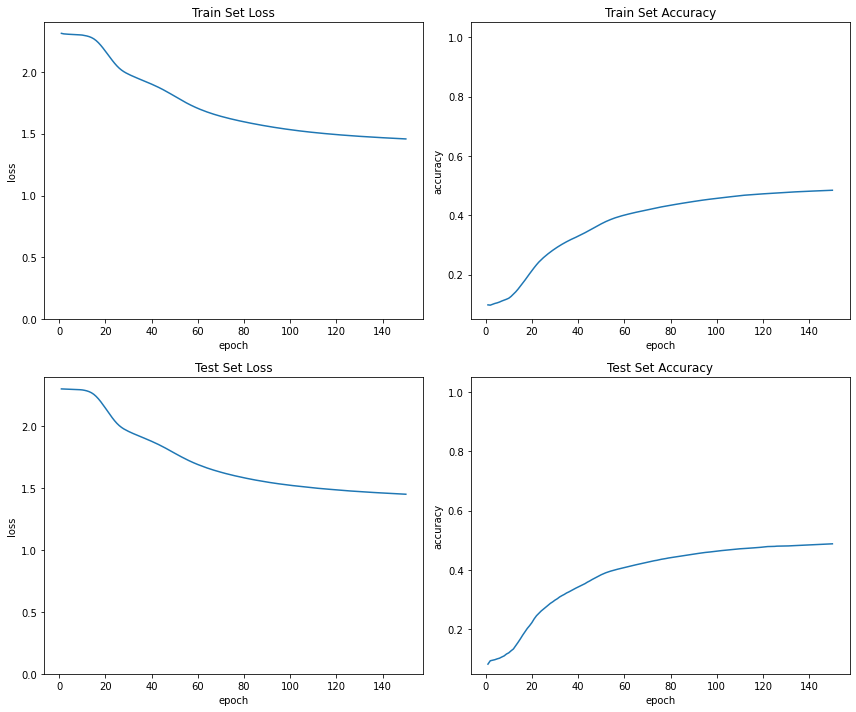

In [11]:
def _moving_average(arr, n):
    cumsum = np.cumsum(np.concatenate(([0] * n, arr)))
    return (cumsum[n:] - cumsum[:-n]) / np.concatenate((np.arange(1, n + 1), np.full((len(arr) - n,), n)))

def _plot_score_vs_epochs(sub_idx, x, y, xlabel, ylabel, title=None, y_min=None, y_max=None, ma=10):
    y = _moving_average(y, ma)
    plt.subplot(2, 2, sub_idx)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title is not None:
        plt.title(title)
    if y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)
    
def plot_all_score_vs_epochs(model_history, model_name, epochs=None, ma=10):
    plt.rcParams['figure.figsize'] = [12, 10]
    
    if epochs is None:
        epochs = EPOCHS
    x = np.arange(1, epochs + 1)  
    
    _plot_score_vs_epochs(1, x, model_history.history['loss'], 'epoch', 'loss',
                          title='Train Set Loss',     y_min=0.00, y_max=2.40, ma=ma)
    _plot_score_vs_epochs(2, x, model_history.history['categorical_accuracy'], 'epoch', 'accuracy',
                          title='Train Set Accuracy', y_min=0.05, y_max=1.05, ma=ma)
    _plot_score_vs_epochs(3, x, model_history.history['val_loss'], 'epoch', 'loss',
                          title='Test Set Loss',      y_min=0.00, y_max=2.40, ma=ma)
    _plot_score_vs_epochs(4, x, model_history.history['val_categorical_accuracy'], 'epoch', 'accuracy',
                          title='Test Set Accuracy',  y_min=0.05, y_max=1.05, ma=ma)
    plt.tight_layout()
    plt.savefig(f'plots/{model_name}_plots.jpg')
    plt.show()
    
plot_all_score_vs_epochs(model_1_history, 'model_1')

## Predictions

In [12]:
model_1.predict(train_images[:4])

array([[6.11518696e-03, 2.88539287e-03, 5.59208840e-02, 2.91548133e-01,
        4.86471951e-02, 3.28328967e-01, 1.43038481e-01, 1.19920790e-01,
        5.40648296e-04, 3.05426260e-03],
       [7.24483794e-03, 3.15667421e-01, 2.44685579e-02, 2.76747849e-02,
        8.54515657e-03, 5.86114191e-02, 9.29102395e-03, 1.35982521e-02,
        3.93604375e-02, 4.95538175e-01],
       [8.17862228e-02, 1.05727546e-01, 1.60972234e-02, 7.58789480e-03,
        3.84267466e-03, 2.98813311e-03, 5.42833144e-03, 4.82048430e-02,
        4.31462340e-02, 6.85190916e-01],
       [9.18779429e-03, 1.24661846e-03, 9.23084840e-02, 5.75737879e-02,
        2.87228286e-01, 4.36516814e-02, 4.64238524e-01, 4.05052043e-02,
        1.65275612e-03, 2.40688305e-03]], dtype=float32)

# Evolution

## Model 2
- Increased the convolution filters number from 5 to 20

In [13]:
model_2 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    tf_layers.Conv2D(20, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.Conv2D(20, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.MaxPooling2D(pool_size=(8, 8)),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_2')

model_2_history, model_2_elapsed_time = compile_and_fit(model_2)

Epoch 1/150
782/782 [==============================] - 4s 5ms/step - loss: 2.3077 - categorical_accuracy: 0.1024 - val_loss: 2.3013 - val_categorical_accuracy: 0.1000
Epoch 2/150
782/782 [==============================] - 3s 4ms/step - loss: 2.3012 - categorical_accuracy: 0.1091 - val_loss: 2.2985 - val_categorical_accuracy: 0.1335
Epoch 3/150
782/782 [==============================] - 3s 4ms/step - loss: 2.2966 - categorical_accuracy: 0.1249 - val_loss: 2.2927 - val_categorical_accuracy: 0.1562
Epoch 4/150
782/782 [==============================] - 3s 4ms/step - loss: 2.2873 - categorical_accuracy: 0.1387 - val_loss: 2.2798 - val_categorical_accuracy: 0.1508
Epoch 5/150
782/782 [==============================] - 3s 4ms/step - loss: 2.2670 - categorical_accuracy: 0.1717 - val_loss: 2.2484 - val_categorical_accuracy: 0.2193
Epoch 6/150
782/782 [==============================] - 3s 4ms/step - loss: 2.2231 - categorical_accuracy: 0.2115 - val_loss: 2.1876 - val_categorical_accuracy: 0.240

Epoch 50/150
782/782 [==============================] - 4s 5ms/step - loss: 1.4891 - categorical_accuracy: 0.4768 - val_loss: 1.4817 - val_categorical_accuracy: 0.4742
Epoch 51/150
782/782 [==============================] - 3s 4ms/step - loss: 1.4814 - categorical_accuracy: 0.4778 - val_loss: 1.4747 - val_categorical_accuracy: 0.4799
Epoch 52/150
782/782 [==============================] - 3s 4ms/step - loss: 1.4747 - categorical_accuracy: 0.4786 - val_loss: 1.4686 - val_categorical_accuracy: 0.4788
Epoch 53/150
782/782 [==============================] - 3s 4ms/step - loss: 1.4671 - categorical_accuracy: 0.4829 - val_loss: 1.4624 - val_categorical_accuracy: 0.4819
Epoch 54/150
782/782 [==============================] - 3s 4ms/step - loss: 1.4601 - categorical_accuracy: 0.4850 - val_loss: 1.4585 - val_categorical_accuracy: 0.4820
Epoch 55/150
782/782 [==============================] - 3s 4ms/step - loss: 1.4541 - categorical_accuracy: 0.4871 - val_loss: 1.4516 - val_categorical_accuracy:

Epoch 99/150
782/782 [==============================] - 3s 4ms/step - loss: 1.2606 - categorical_accuracy: 0.5567 - val_loss: 1.2654 - val_categorical_accuracy: 0.5492
Epoch 100/150
782/782 [==============================] - 3s 4ms/step - loss: 1.2582 - categorical_accuracy: 0.5578 - val_loss: 1.2619 - val_categorical_accuracy: 0.5541
Epoch 101/150
782/782 [==============================] - 3s 4ms/step - loss: 1.2559 - categorical_accuracy: 0.5589 - val_loss: 1.2636 - val_categorical_accuracy: 0.5503
Epoch 102/150
782/782 [==============================] - 3s 4ms/step - loss: 1.2534 - categorical_accuracy: 0.5595 - val_loss: 1.2603 - val_categorical_accuracy: 0.5552
Epoch 103/150
782/782 [==============================] - 3s 4ms/step - loss: 1.2513 - categorical_accuracy: 0.5603 - val_loss: 1.2535 - val_categorical_accuracy: 0.5561
Epoch 104/150
782/782 [==============================] - 3s 4ms/step - loss: 1.2478 - categorical_accuracy: 0.5624 - val_loss: 1.2541 - val_categorical_accu

In [14]:
model_2.count_params()

7390

Elapsed time: 501.13 s


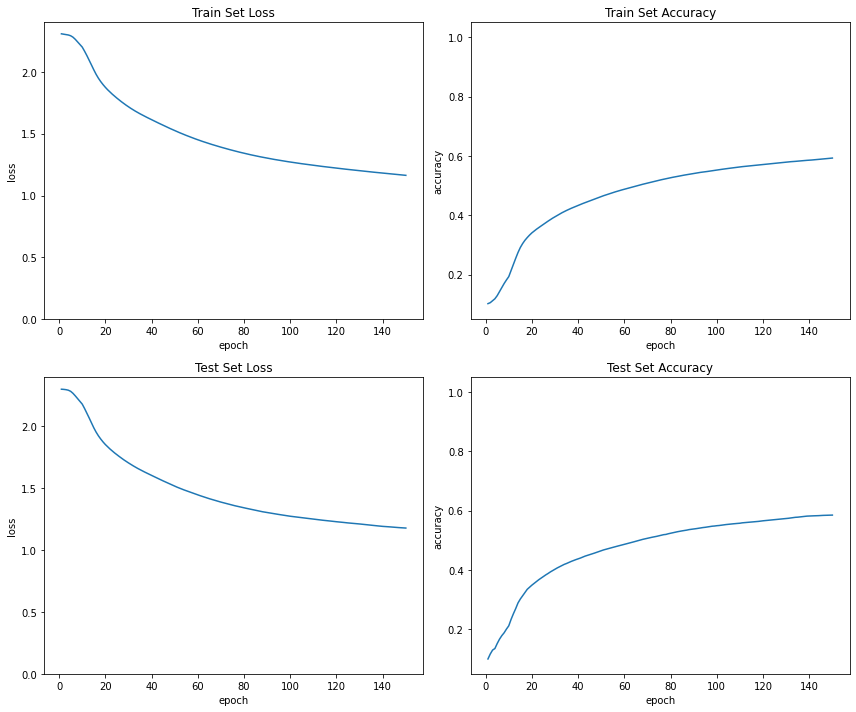

In [15]:
print(f'Elapsed time: {(model_2_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_2_history, 'model_2', ma=10)

## Model 3.1
- two convolution blocks (20, 40) instead of one (20)

In [16]:
def convolution_block(n_filters, activation='relu'):
    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.MaxPooling2D(pool_size=(2, 2))]

In [17]:
model_3_1 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20, 'sigmoid'),
    *convolution_block(40, 'sigmoid'),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_3_1')

model_3_1_history, model_3_1_elapsed_time = compile_and_fit(model_3_1, epochs=15)

Epoch 1/15
782/782 [==============================] - 5s 6ms/step - loss: 2.3250 - categorical_accuracy: 0.0992 - val_loss: 2.3211 - val_categorical_accuracy: 0.1000
Epoch 2/15
782/782 [==============================] - 4s 6ms/step - loss: 2.3189 - categorical_accuracy: 0.1006 - val_loss: 2.3256 - val_categorical_accuracy: 0.1000
Epoch 3/15
782/782 [==============================] - 5s 6ms/step - loss: 2.3155 - categorical_accuracy: 0.1000 - val_loss: 2.3122 - val_categorical_accuracy: 0.1000
Epoch 4/15
782/782 [==============================] - 5s 6ms/step - loss: 2.3132 - categorical_accuracy: 0.1013 - val_loss: 2.3079 - val_categorical_accuracy: 0.1000
Epoch 5/15
782/782 [==============================] - 5s 6ms/step - loss: 2.3117 - categorical_accuracy: 0.0982 - val_loss: 2.3099 - val_categorical_accuracy: 0.1000
Epoch 6/15
782/782 [==============================] - 5s 6ms/step - loss: 2.3090 - categorical_accuracy: 0.0998 - val_loss: 2.3073 - val_categorical_accuracy: 0.1000
Epoc

Elapsed time: 69.65 s


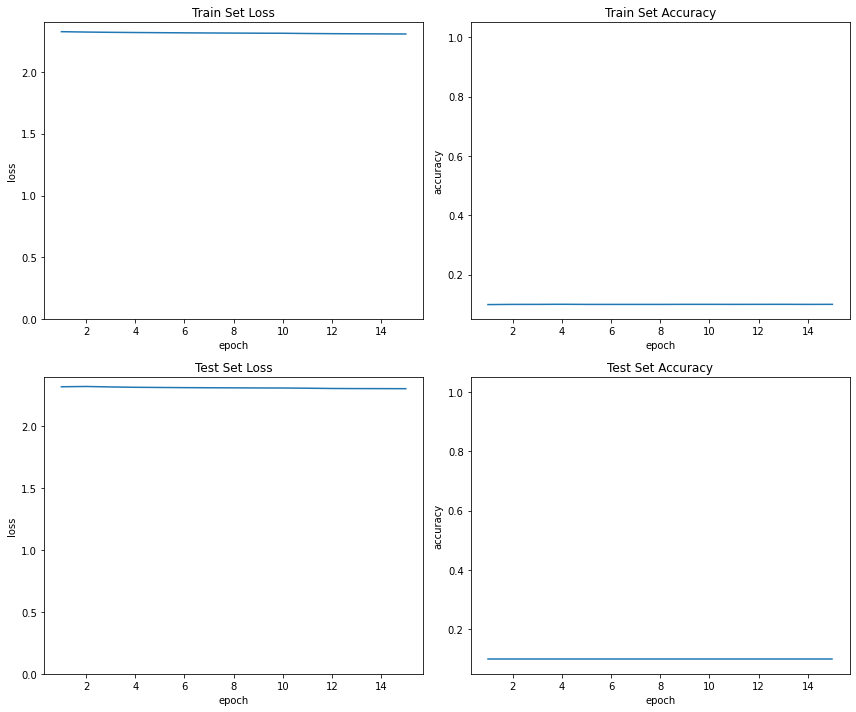

In [18]:
print(f'Elapsed time: {(model_3_1_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_1_history, 'model_3_1', epochs=15)

# Model 3.2
- ReLU instead of sigmoid in Conv2D

In [19]:
model_3_2 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20),
    *convolution_block(40),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='sigmoid')
], name='model_3_2')

model_3_2_history, model_3_2_elapsed_time = compile_and_fit(model_3_2)

Epoch 1/150
782/782 [==============================] - 5s 6ms/step - loss: 2.0411 - categorical_accuracy: 0.2609 - val_loss: 1.8336 - val_categorical_accuracy: 0.3486
Epoch 2/150
782/782 [==============================] - 4s 6ms/step - loss: 1.7346 - categorical_accuracy: 0.3845 - val_loss: 1.6435 - val_categorical_accuracy: 0.4101
Epoch 3/150
782/782 [==============================] - 4s 5ms/step - loss: 1.5713 - categorical_accuracy: 0.4401 - val_loss: 1.5112 - val_categorical_accuracy: 0.4582
Epoch 4/150
782/782 [==============================] - 4s 5ms/step - loss: 1.4547 - categorical_accuracy: 0.4834 - val_loss: 1.3922 - val_categorical_accuracy: 0.5041
Epoch 5/150
782/782 [==============================] - 4s 5ms/step - loss: 1.3614 - categorical_accuracy: 0.5191 - val_loss: 1.3615 - val_categorical_accuracy: 0.5196
Epoch 6/150
782/782 [==============================] - 4s 5ms/step - loss: 1.2840 - categorical_accuracy: 0.5487 - val_loss: 1.2639 - val_categorical_accuracy: 0.553

Epoch 50/150
782/782 [==============================] - 4s 6ms/step - loss: 0.4186 - categorical_accuracy: 0.8557 - val_loss: 1.0167 - val_categorical_accuracy: 0.7015
Epoch 51/150
782/782 [==============================] - 4s 6ms/step - loss: 0.4136 - categorical_accuracy: 0.8557 - val_loss: 0.9919 - val_categorical_accuracy: 0.7080
Epoch 52/150
782/782 [==============================] - 4s 6ms/step - loss: 0.4078 - categorical_accuracy: 0.8584 - val_loss: 1.0211 - val_categorical_accuracy: 0.7136
Epoch 53/150
782/782 [==============================] - 4s 6ms/step - loss: 0.3986 - categorical_accuracy: 0.8604 - val_loss: 1.0206 - val_categorical_accuracy: 0.7100
Epoch 54/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3918 - categorical_accuracy: 0.8633 - val_loss: 1.0235 - val_categorical_accuracy: 0.7106
Epoch 55/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3817 - categorical_accuracy: 0.8677 - val_loss: 1.0348 - val_categorical_accuracy:

Epoch 99/150
782/782 [==============================] - 4s 5ms/step - loss: 0.1618 - categorical_accuracy: 0.9413 - val_loss: 1.9817 - val_categorical_accuracy: 0.6941
Epoch 100/150
782/782 [==============================] - 4s 6ms/step - loss: 0.1631 - categorical_accuracy: 0.9411 - val_loss: 1.9540 - val_categorical_accuracy: 0.6979
Epoch 101/150
782/782 [==============================] - 4s 6ms/step - loss: 0.1569 - categorical_accuracy: 0.9428 - val_loss: 1.9904 - val_categorical_accuracy: 0.6916
Epoch 102/150
782/782 [==============================] - 4s 6ms/step - loss: 0.1623 - categorical_accuracy: 0.9390 - val_loss: 2.0309 - val_categorical_accuracy: 0.6915
Epoch 103/150
782/782 [==============================] - 4s 6ms/step - loss: 0.1572 - categorical_accuracy: 0.9425 - val_loss: 2.0820 - val_categorical_accuracy: 0.6891
Epoch 104/150
782/782 [==============================] - 4s 6ms/step - loss: 0.1510 - categorical_accuracy: 0.9452 - val_loss: 2.2098 - val_categorical_accu

Elapsed time: 648.56 s


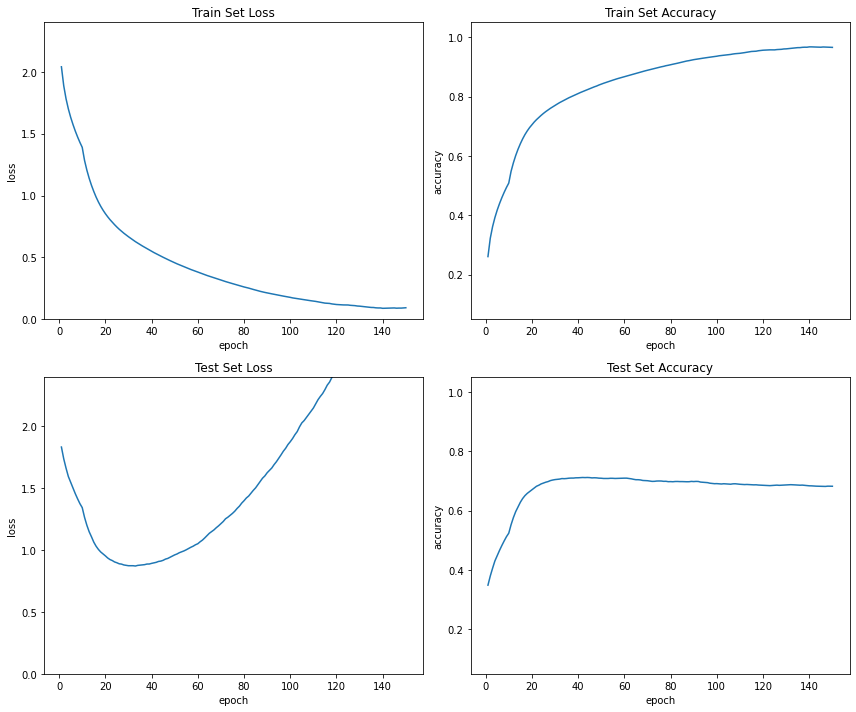

In [20]:
print(f'Elapsed time: {(model_3_2_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_2_history, 'model_3_2')

## Model 3.3
- two next blocks: (20, 40, 80, 160)

In [21]:
model_3_3 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20),
    *convolution_block(40),
    *convolution_block(80),
    *convolution_block(160),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_3_3')

model_3_3_history, model_3_3_elapsed_time = compile_and_fit(model_3_3)

Epoch 1/150
782/782 [==============================] - 7s 8ms/step - loss: 2.2771 - categorical_accuracy: 0.1361 - val_loss: 2.1432 - val_categorical_accuracy: 0.2260
Epoch 2/150
782/782 [==============================] - 6s 8ms/step - loss: 1.9568 - categorical_accuracy: 0.2886 - val_loss: 1.8201 - val_categorical_accuracy: 0.3395
Epoch 3/150
782/782 [==============================] - 6s 8ms/step - loss: 1.7158 - categorical_accuracy: 0.3847 - val_loss: 1.6719 - val_categorical_accuracy: 0.4091
Epoch 4/150
782/782 [==============================] - 6s 8ms/step - loss: 1.5532 - categorical_accuracy: 0.4427 - val_loss: 1.4660 - val_categorical_accuracy: 0.4745
Epoch 5/150
782/782 [==============================] - 6s 8ms/step - loss: 1.4484 - categorical_accuracy: 0.4854 - val_loss: 1.3989 - val_categorical_accuracy: 0.4981
Epoch 6/150
782/782 [==============================] - 6s 8ms/step - loss: 1.3600 - categorical_accuracy: 0.5167 - val_loss: 1.3479 - val_categorical_accuracy: 0.516

Epoch 50/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0493 - categorical_accuracy: 0.9834 - val_loss: 2.8705 - val_categorical_accuracy: 0.6327
Epoch 51/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0434 - categorical_accuracy: 0.9851 - val_loss: 2.8899 - val_categorical_accuracy: 0.6427
Epoch 52/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0389 - categorical_accuracy: 0.9863 - val_loss: 3.0610 - val_categorical_accuracy: 0.6267
Epoch 53/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0423 - categorical_accuracy: 0.9853 - val_loss: 2.9801 - val_categorical_accuracy: 0.6400
Epoch 54/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0199 - categorical_accuracy: 0.9933 - val_loss: 3.1948 - val_categorical_accuracy: 0.6338
Epoch 55/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0203 - categorical_accuracy: 0.9933 - val_loss: 3.3712 - val_categorical_accuracy:

Epoch 99/150
782/782 [==============================] - 7s 8ms/step - loss: 0.0134 - categorical_accuracy: 0.9956 - val_loss: 3.6317 - val_categorical_accuracy: 0.6500
Epoch 100/150
782/782 [==============================] - 7s 9ms/step - loss: 0.0059 - categorical_accuracy: 0.9980 - val_loss: 3.9252 - val_categorical_accuracy: 0.6493
Epoch 101/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0053 - categorical_accuracy: 0.9983 - val_loss: 3.8283 - val_categorical_accuracy: 0.6561
Epoch 102/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0029 - categorical_accuracy: 0.9991 - val_loss: 3.9109 - val_categorical_accuracy: 0.6565
Epoch 103/150
782/782 [==============================] - 6s 8ms/step - loss: 3.8739e-04 - categorical_accuracy: 1.0000 - val_loss: 3.9437 - val_categorical_accuracy: 0.6544
Epoch 104/150
782/782 [==============================] - 6s 8ms/step - loss: 7.2236e-05 - categorical_accuracy: 1.0000 - val_loss: 3.9723 - val_categori

Elapsed time: 954.19 s


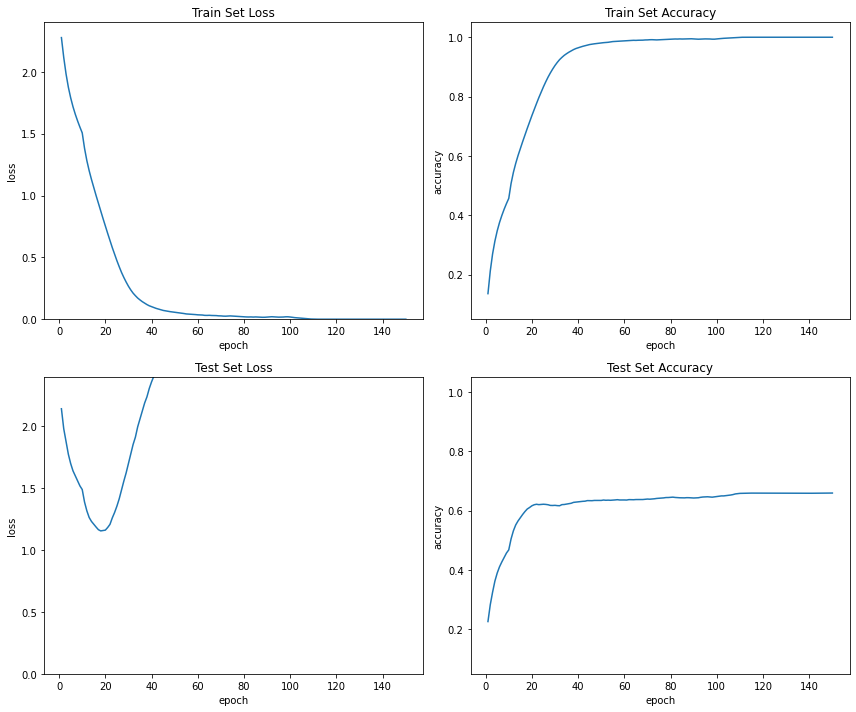

In [22]:
print(f'Elapsed time: {(model_3_3_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_3_history, 'model_3_3')

## Model 4
- batch normalization

In [23]:
def convolution_block_with_batch_normalization(n_filters, activation='relu'):
    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.MaxPooling2D(pool_size=(2, 2))]

model_4 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_batch_normalization(20),
    *convolution_block_with_batch_normalization(40),
    *convolution_block_with_batch_normalization(80),
    *convolution_block_with_batch_normalization(160),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_4')

model_4_history, model_4_elapsed_time = compile_and_fit(model_4)

Epoch 1/150
782/782 [==============================] - 10s 11ms/step - loss: 1.4799 - categorical_accuracy: 0.4896 - val_loss: 1.2174 - val_categorical_accuracy: 0.5720
Epoch 2/150
782/782 [==============================] - 9s 11ms/step - loss: 0.9914 - categorical_accuracy: 0.6507 - val_loss: 1.0524 - val_categorical_accuracy: 0.6315
Epoch 3/150
782/782 [==============================] - 8s 10ms/step - loss: 0.7952 - categorical_accuracy: 0.7224 - val_loss: 1.0399 - val_categorical_accuracy: 0.6369
Epoch 4/150
782/782 [==============================] - 8s 10ms/step - loss: 0.6560 - categorical_accuracy: 0.7708 - val_loss: 0.9387 - val_categorical_accuracy: 0.6778
Epoch 5/150
782/782 [==============================] - 8s 10ms/step - loss: 0.5400 - categorical_accuracy: 0.8134 - val_loss: 0.8831 - val_categorical_accuracy: 0.7031
Epoch 6/150
782/782 [==============================] - 8s 10ms/step - loss: 0.4407 - categorical_accuracy: 0.8487 - val_loss: 0.8559 - val_categorical_accuracy

782/782 [==============================] - 8s 10ms/step - loss: 4.9713e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4355 - val_categorical_accuracy: 0.7423
Epoch 97/150
782/782 [==============================] - 8s 10ms/step - loss: 4.7132e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4331 - val_categorical_accuracy: 0.7420
Epoch 98/150
782/782 [==============================] - 8s 10ms/step - loss: 4.5134e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4321 - val_categorical_accuracy: 0.7416
Epoch 99/150
782/782 [==============================] - 7s 10ms/step - loss: 5.1128e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4375 - val_categorical_accuracy: 0.7417
Epoch 100/150
782/782 [==============================] - 7s 10ms/step - loss: 9.5989e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4452 - val_categorical_accuracy: 0.7396
Epoch 101/150
782/782 [==============================] - 7s 10ms/step - loss: 5.8671e-04 - categorical_accuracy: 1.0000 - val_loss: 1.4347 - val_ca

Elapsed time: 1142.00 s


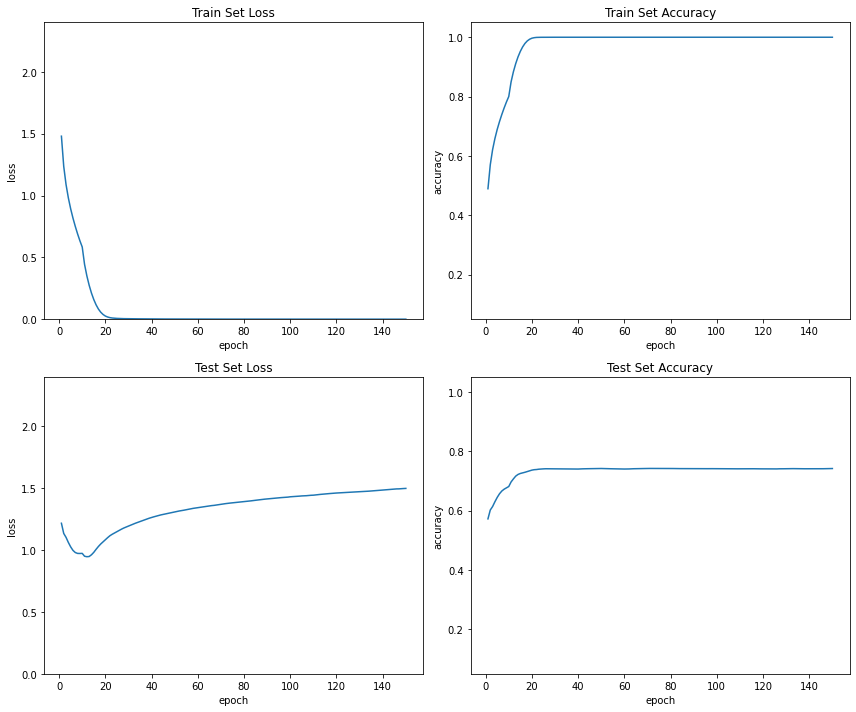

In [24]:
print(f'Elapsed time: {(model_4_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_4_history, 'model_4')

# Model 5

- dropout layer

In [25]:
def convolution_block_with_dropout(n_filters, dropout_rate, activation='relu'):
    return (convolution_block_with_batch_normalization(n_filters, activation) + 
            [tf_layers.Dropout(dropout_rate)])

model_5 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_dropout( 20, 0.1),
    *convolution_block_with_dropout( 40, 0.2),
    *convolution_block_with_dropout( 80, 0.3),
    *convolution_block_with_dropout(160, 0.4),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_5')

model_5_history, model_5_elapsed_time = compile_and_fit(model_5)

Epoch 1/150
782/782 [==============================] - 9s 10ms/step - loss: 2.0140 - categorical_accuracy: 0.3685 - val_loss: 1.4217 - val_categorical_accuracy: 0.4969
Epoch 2/150
782/782 [==============================] - 8s 10ms/step - loss: 1.4446 - categorical_accuracy: 0.4950 - val_loss: 1.1861 - val_categorical_accuracy: 0.5800
Epoch 3/150
782/782 [==============================] - 8s 10ms/step - loss: 1.2598 - categorical_accuracy: 0.5579 - val_loss: 1.1635 - val_categorical_accuracy: 0.5890
Epoch 4/150
782/782 [==============================] - 8s 10ms/step - loss: 1.1317 - categorical_accuracy: 0.6036 - val_loss: 0.9863 - val_categorical_accuracy: 0.6466
Epoch 5/150
782/782 [==============================] - 8s 10ms/step - loss: 1.0389 - categorical_accuracy: 0.6312 - val_loss: 0.9488 - val_categorical_accuracy: 0.6652
Epoch 6/150
782/782 [==============================] - 8s 10ms/step - loss: 0.9734 - categorical_accuracy: 0.6567 - val_loss: 0.8455 - val_categorical_accuracy:

782/782 [==============================] - 8s 10ms/step - loss: 0.1905 - categorical_accuracy: 0.9303 - val_loss: 0.5599 - val_categorical_accuracy: 0.8443
Epoch 98/150
782/782 [==============================] - 8s 10ms/step - loss: 0.1835 - categorical_accuracy: 0.9345 - val_loss: 0.6095 - val_categorical_accuracy: 0.8377
Epoch 99/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1838 - categorical_accuracy: 0.9343 - val_loss: 0.5814 - val_categorical_accuracy: 0.8455
Epoch 100/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1808 - categorical_accuracy: 0.9339 - val_loss: 0.5875 - val_categorical_accuracy: 0.8412
Epoch 101/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1853 - categorical_accuracy: 0.9337 - val_loss: 0.5741 - val_categorical_accuracy: 0.8443
Epoch 102/150
782/782 [==============================] - 8s 10ms/step - loss: 0.1770 - categorical_accuracy: 0.9367 - val_loss: 0.5797 - val_categorical_accuracy: 0.8

Elapsed time: 1232.99 s


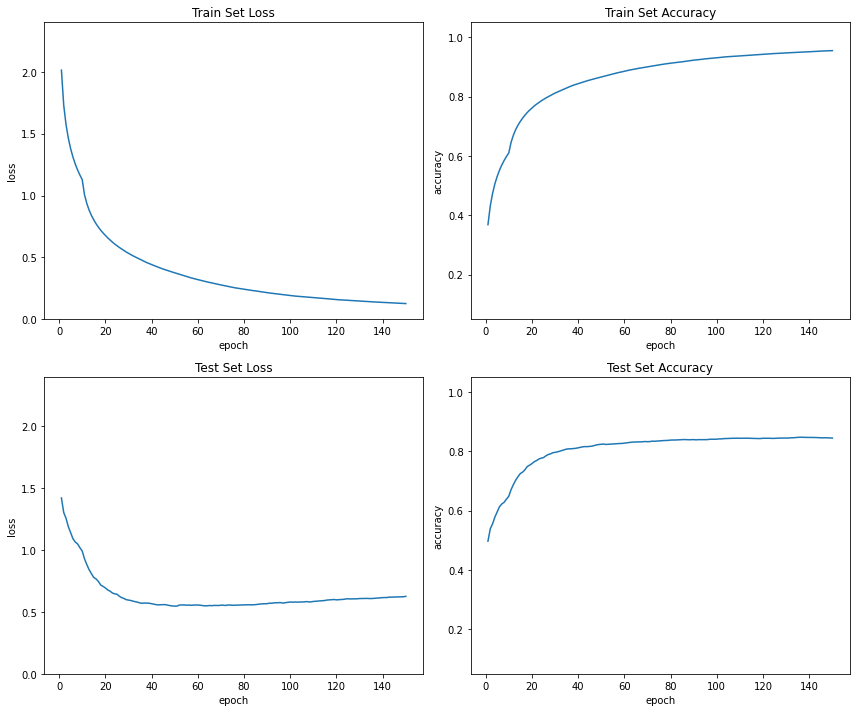

In [26]:
print(f'Elapsed time: {(model_5_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_5_history, 'model_5')

# GAP

## Model 6
- Global Average Pooling (GAP)

In [27]:
def convolution_block_with_opt_gap(n_filters, dropout_rate, gap=False, activation='relu'):
    if gap:
        pool_or_gap_layer = tf_layers.GlobalAveragePooling2D()
    else:
        pool_or_gap_layer = tf_layers.MaxPooling2D(pool_size=(2, 2))

    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            pool_or_gap_layer,
            tf_layers.Dropout(dropout_rate)]

model_6 = tf.keras.Sequential(layers=[
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_opt_gap( 20, 0.1),
    *convolution_block_with_opt_gap( 40, 0.2),
    *convolution_block_with_opt_gap( 80, 0.3),
    *convolution_block_with_opt_gap(160, 0.4, gap=True),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_6')

model_6_history, model_6_elapsed_time = compile_and_fit(model_6)
model_6.save_weights('./saved_weights/model_6_weights')

Epoch 1/150
782/782 [==============================] - 9s 11ms/step - loss: 1.6416 - categorical_accuracy: 0.3951 - val_loss: 1.5381 - val_categorical_accuracy: 0.4448
Epoch 2/150
782/782 [==============================] - 8s 11ms/step - loss: 1.2810 - categorical_accuracy: 0.5388 - val_loss: 1.1163 - val_categorical_accuracy: 0.5974
Epoch 3/150
782/782 [==============================] - 8s 11ms/step - loss: 1.1200 - categorical_accuracy: 0.5999 - val_loss: 1.0471 - val_categorical_accuracy: 0.6201
Epoch 4/150
782/782 [==============================] - 8s 11ms/step - loss: 1.0323 - categorical_accuracy: 0.6330 - val_loss: 1.1003 - val_categorical_accuracy: 0.6175
Epoch 5/150
782/782 [==============================] - 8s 11ms/step - loss: 0.9581 - categorical_accuracy: 0.6641 - val_loss: 0.8805 - val_categorical_accuracy: 0.6887
Epoch 6/150
782/782 [==============================] - 8s 11ms/step - loss: 0.9033 - categorical_accuracy: 0.6825 - val_loss: 0.8825 - val_categorical_accuracy:

782/782 [==============================] - 8s 11ms/step - loss: 0.2046 - categorical_accuracy: 0.9276 - val_loss: 0.5626 - val_categorical_accuracy: 0.8432
Epoch 98/150
782/782 [==============================] - 8s 11ms/step - loss: 0.2014 - categorical_accuracy: 0.9285 - val_loss: 0.5359 - val_categorical_accuracy: 0.8507
Epoch 99/150
782/782 [==============================] - 8s 11ms/step - loss: 0.2085 - categorical_accuracy: 0.9254 - val_loss: 0.5470 - val_categorical_accuracy: 0.8439
Epoch 100/150
782/782 [==============================] - 8s 11ms/step - loss: 0.2041 - categorical_accuracy: 0.9274 - val_loss: 0.5676 - val_categorical_accuracy: 0.8417
Epoch 101/150
782/782 [==============================] - 8s 11ms/step - loss: 0.2046 - categorical_accuracy: 0.9276 - val_loss: 0.5442 - val_categorical_accuracy: 0.8497
Epoch 102/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1967 - categorical_accuracy: 0.9305 - val_loss: 0.5374 - val_categorical_accuracy: 0.8

Elapsed time: 1261.03 s


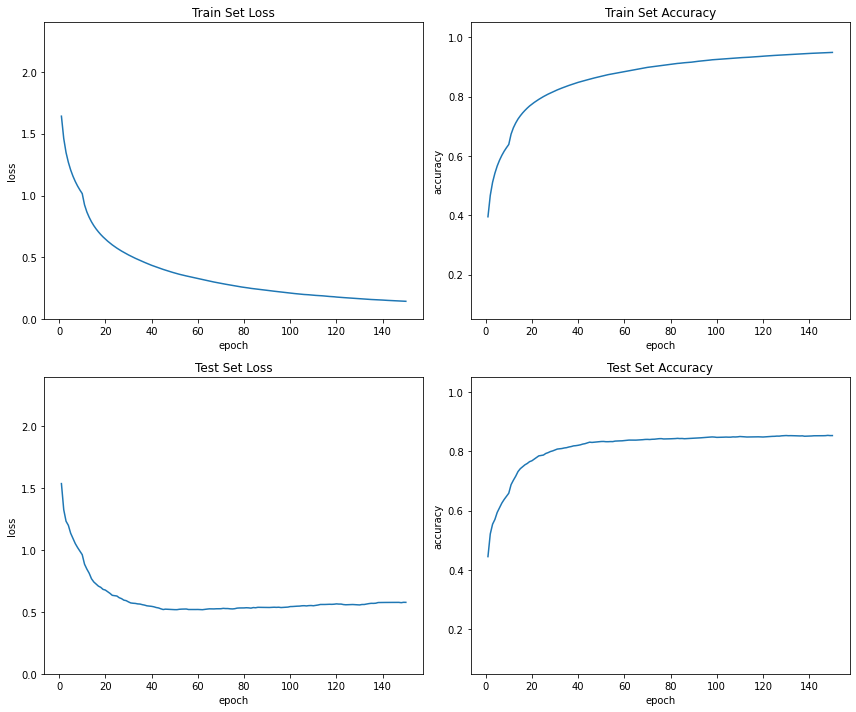

In [28]:
print(f'Elapsed time: {(model_6_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_6_history, 'model_6')

## New image
- Don-vip, [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)

128 x 96


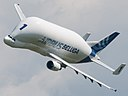

In [29]:
raw_image = Image.open('./Airbus_beluga.jpg')
print(f'{raw_image.width} x {raw_image.height}')
raw_image

In [30]:
resized_image = raw_image.resize((round(raw_image.width / 3), round(raw_image.height / 3)), Image.ANTIALIAS)
resized_image.width, resized_image.height

(43, 32)

In [31]:
image = np.array(resized_image)
print(model_6.predict(np.array([image])))
print('Predicted class:', np.argmax(model_6.predict(np.array([image]))))

[[9.9996912e-01 4.3297874e-08 3.0708281e-05 4.9891277e-08 8.4699415e-08
  1.2487273e-09 5.3499544e-10 1.9927351e-11 4.8475384e-09 1.0815330e-09]]
Predicted class: 0
